In [1]:
import pandas as pd
import numpy as np
import json
import geopandas as gp
import matplotlib.pyplot as plt

In [2]:
import googlemaps as gm
import pprint
import time

In [4]:
API_key = ''
#paste your API here

In [5]:
# Defining our client
gmaps = gm.Client(key = API_key)

Using places_nearby function

In [311]:
places_result = gmaps.places_nearby(location='47.980709, 8.929490',radius=40000,open_now= False, type = 'cafe')

In [312]:
places_result = pd.DataFrame(places_result['results'])

In [313]:
len(places_result)

20

Using Find Place requests function

In [314]:
find_place_result = gmaps.find_place(input= 'Hotel Garni Iris am See', input_type= 'textquery')

In [315]:
pprint.pprint(find_place_result)

{'candidates': [{'place_id': 'ChIJMzX979lhmkcRE5rdeQGWPQA'}], 'status': 'OK'}


In [316]:
cd = find_place_result['candidates']
place_id_new = cd[0]['place_id']

Using place details function

In [317]:
my_fields = ["adr_address", "alt_id", "formatted_address",
    "geometry", "icon", "id", "name", "permanently_closed",
    "place_id", "plus_code",  "type", "url", "utc_offset", "vicinity"]
# Not able to use 'user_ratings_total' field which should have been under basic set

In [318]:
places_details = gmaps.place(place_id= place_id_new,fields= my_fields)

In [319]:
pprint.pprint(places_details)

{'html_attributions': [],
 'result': {'adr_address': '<span class="street-address">Rebsteig 2</span>, '
                           '<span class="postal-code">78315</span> <span '
                           'class="locality">Radolfzell am Bodensee</span>, '
                           '<span class="country-name">Germany</span>',
            'formatted_address': 'Rebsteig 2, 78315 Radolfzell am Bodensee, '
                                 'Germany',
            'geometry': {'location': {'lat': 47.73292199999999,
                                      'lng': 8.984551},
                         'viewport': {'northeast': {'lat': 47.73426328029149,
                                                    'lng': 8.985923180291502},
                                      'southwest': {'lat': 47.73156531970849,
                                                    'lng': 8.983225219708498}}},
            'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/lodging-71.png',
            'id': '23ec75

Extracting only restaurant data 

In [320]:
restaurants_near_DAO = gmaps.places_nearby(location='41.892690, -87.621900',radius=40000,open_now= False, type = 'restaurants')

In [ ]:
Rest_near_DAO = []

In [ ]:
for place in restaurants_near_DAO['results']:
    place_id_res = place['place_id']
    places_details = gmaps.place(place_id= place_id_res,fields= my_fields)
    Rest_near_DAO.append(places_details['result'])

In [ ]:
len(Rest_near_DAO)

In [5]:
business_data_cleaned = pd.DataFrame(pd.read_csv('C:\\Users\\Sanchayni\\Desktop\\Spring19\\DPA\\Project\\yelp_dataset\\business.csv'))

In [ ]:
len(business_data_cleaned)*0.5/60

Lets say we want 30% data from google API that's 7440 restaurants. <br>
Thus we would need 124 (60 restaurants per cluster) cluster centers

In [6]:
import seaborn as sns 
sns.set()

In [7]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [8]:
from shapely.geometry import Point

The points function needs parameters as ('Lon','Lat') not the other way around

In [9]:
# Creating point coordinates from lat and long
business_data_cleaned['location_coordinates'] = list(zip(business_data_cleaned.longitude  , business_data_cleaned.latitude))
business_data_cleaned['location_coordinates'] = business_data_cleaned['location_coordinates'].apply(Point)

In [10]:
geo_business_data_cleaned = gp.GeoDataFrame(business_data_cleaned, geometry='location_coordinates')

In [12]:
geo_business_data_cleaned.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,australian,pub food,south african,soba,calabrian,pita,hong kong style cafe,churros,iberian,location_coordinates
0,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",charlotte,NC,28210.0,35.092564,-80.859132,4.0,170,...,0,0,0,0,0,0,0,0,0,POINT (-80.85913199999999 35.092564)
1,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,phoenix,AZ,85016.0,33.495194,-112.028588,3.0,18,...,0,0,0,0,0,0,0,0,0,POINT (-112.0285876 33.4951941)
2,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,mentor on the lake,OH,44060.0,41.708520,-81.359556,4.0,16,...,0,0,0,0,0,0,0,0,0,POINT (-81.35955600000001 41.70852)
3,1RHY4K3BD22FK7Cfftn8Mg,Marathon Diner,"Center Core - Food Court, Fl 3, Pittsburgh Int...",pittsburgh,PA,15231.0,40.496177,-80.246011,4.0,35,...,0,0,0,0,0,0,0,0,0,POINT (-80.24601123640001 40.4961769456)
4,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,las vegas,NV,89156.0,36.195615,-115.040529,4.5,184,...,0,0,0,0,0,0,0,0,0,POINT (-115.0405289 36.1956146)


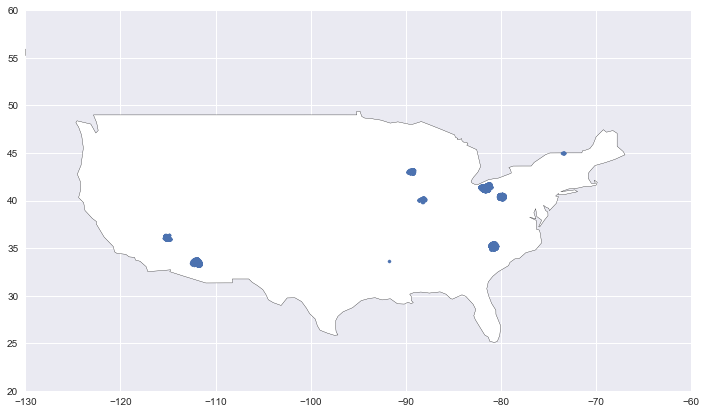

In [13]:
ax = world.loc[world['iso_a3'] == 'USA',:].plot(edgecolor='k', facecolor='white')
geo_business_data_cleaned.plot(ax = ax, markersize = 10)
ax.set(xlim=(-130, -60), ylim=(20,55))
plt.gcf().set_size_inches(12,7)
plt.show()

### To find centers of our clustered data lets find clusters based on Latitude and Longitude

In [14]:
from sklearn.cluster import KMeans

In [15]:
import random

In [16]:
random.seed(251)
no_of_clusters = 300

In [17]:
kmeans = KMeans(n_clusters=no_of_clusters,n_init=20)

In [18]:
Business_lat_long = business_data_cleaned[['latitude','longitude']]

In [19]:
kmeans.fit(Business_lat_long)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=300, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
Business_lat_long['cluster_pred'] = kmeans.predict(Business_lat_long)

C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show>

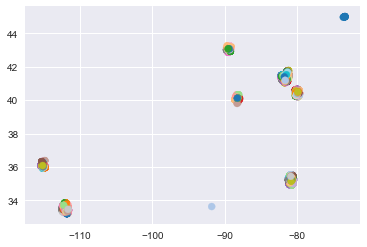

In [21]:
plt.scatter( Business_lat_long['longitude'], Business_lat_long['latitude'], c=Business_lat_long['cluster_pred'], s=50, cmap='tab20')
plt.show

In [22]:
# Creating point coordinates from lat and long
Business_lat_long['location_coordinates'] = list(zip(Business_lat_long.longitude , Business_lat_long.latitude))
Business_lat_long['location_coordinates'] = Business_lat_long['location_coordinates'].apply(Point)

C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
geo_Business_lat_long = gp.GeoDataFrame(Business_lat_long, geometry='location_coordinates')

In [24]:
geo_Business_lat_long.head()

,latitude,longitude,cluster_pred,location_coordinates
0,35.092564,-80.859132,17,POINT (-80.85913199999999 35.092564)
1,33.495194,-112.028588,211,POINT (-112.0285876 33.4951941)
2,41.708520,-81.359556,64,POINT (-81.35955600000001 41.70852)
3,40.496177,-80.246011,148,POINT (-80.24601123640001 40.4961769456)
4,36.195615,-115.040529,38,POINT (-115.0405289 36.1956146)


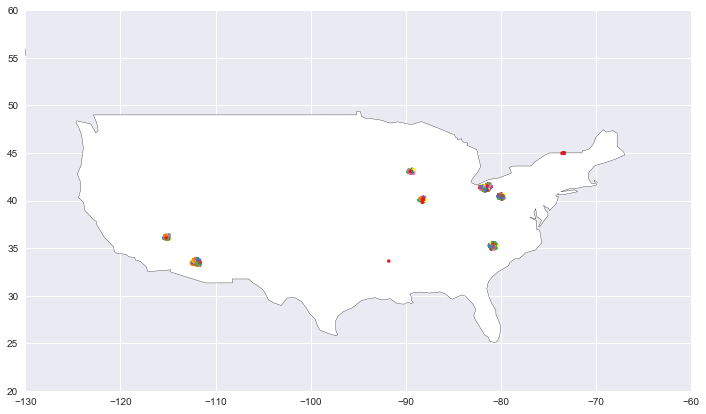

In [227]:
ax = world.loc[world['iso_a3'] == 'USA',:].plot(edgecolor='k', facecolor='white')
geo_Business_lat_long.plot(ax = ax,cmap='Set1', column='cluster_pred',markersize =10)
ax.set(xlim=(-130, -60), ylim=(20,60))
plt.gcf().set_size_inches(12,7)
plt.show()

In [26]:
Business_centers = kmeans.cluster_centers_

In [27]:
# Lets use this library to find distance between centers and the fartest point in a cluster
import geopy.distance as geod

In [25]:
coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

geod.VincentyDistance(coords_1,coords_2).km
# This distance is in km

C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  after removing the cwd from sys.path.


279.35290160386563

In [28]:
Business_lat_long['center_lon']  = [Business_centers[x][1] for x in Business_lat_long['cluster_pred']]
Business_lat_long['center_lat']  = [Business_centers[x][0] for x in Business_lat_long['cluster_pred']]

C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


The format in which geod.VincentyDistance takes the coordinate is (Latitude, Longitude)

In [29]:
Business_lat_long['location_coordinates'] = list(zip(Business_lat_long.latitude , Business_lat_long.longitude ))
#Business_lat_long['location_coordinates'] = Business_lat_long['location_coordinates'].apply(Point)

C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
Business_lat_long['center_coordinates'] = list(zip(Business_lat_long.center_lat, Business_lat_long.center_lon  ))
#Business_lat_long['center_coordinates'] = Business_lat_long['center_coordinates'].apply(Point)

C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
Business_lat_long.head()

,latitude,longitude,cluster_pred,location_coordinates,center_lon,center_lat,center_coordinates
0,35.092564,-80.859132,17,"(35.092564, -80.85913199999999)",-80.871511,35.091017,"(35.09101679945728, -80.8715110236466)"
1,33.495194,-112.028588,211,"(33.4951941, -112.0285876)",-112.034766,33.492028,"(33.492027553171525, -112.03476637361854)"
2,41.708520,-81.359556,64,"(41.70852, -81.35955600000001)",-81.345886,41.687250,"(41.687249950819606, -81.34588604078235)"
3,40.496177,-80.246011,148,"(40.4961769456, -80.24601123640001)",-80.229682,40.507291,"(40.50729060619385, -80.22968193970308)"
4,36.195615,-115.040529,38,"(36.1956146, -115.04052890000001)",-115.062930,36.166731,"(36.166731240374496, -115.06292973070134)"


In [32]:
Business_lat_long['Distfrmcenters_km'] = [geod.VincentyDistance(Business_lat_long.loc[x,'location_coordinates'],Business_lat_long.loc[x,'center_coordinates']).km for x in range(len(Business_lat_long))]

C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  """Entry point for launching an IPython kernel.
C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
Business_lat_long['cluster_pred'] = Business_lat_long['cluster_pred'].astype('category')

C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
max_cluster_dist = pd.DataFrame(Business_lat_long.groupby('cluster_pred')['Distfrmcenters_km'].agg({'max_dist':'max'}))

C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [35]:
max_cluster_dist.head()

,max_dist
cluster_pred,
0,6.571258
1,3.797746
2,2.996571
3,2.744396
4,4.026485


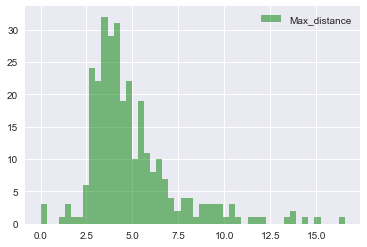

In [37]:
bins = 50
plt.hist(max_cluster_dist['max_dist'], bins, alpha=0.5, label='Max_distance', color= 'green')
plt.legend(loc='upper right')
plt.show()

### Lets go till radius of 3KM as (35,10)KM gave us a lot of repeated restaurants

radius parameter in places_nearby API is in meters (2000 meters) <br>
location is requires 'latitude,longitude' format

After reading the Google API documentation carefully, I realized that we cannot go beyond 50000m, but as our data showcase we might not need to go beyond that. <br>
Also with each query request. We get only 60 search result

## DO NOT RUN AGAIN

In [38]:
restaurants_placesAPI = {}
for i in range(no_of_clusters):
    name = 'rest_for_cluster'+str(i+1)
    restaurants_placesAPI[name] = gmaps.places_nearby(location=str(Business_centers[i][0]) + ',' + str(Business_centers[i][1]),
                                                      radius=3000,
                                                      type = 'restaurant')  

In [39]:
Restaurants_nearby_all = pd.DataFrame(restaurants_placesAPI['rest_for_cluster1']['results'])
for i in range(1,no_of_clusters):
    name = 'rest_for_cluster'+str(i+1)
    Restaurants_nearby_all = pd.concat([Restaurants_nearby_all,pd.DataFrame(restaurants_placesAPI[name]['results'])])

In [42]:
len(Restaurants_nearby_all)/20

497.7

### 2nd batch of values (next token)

## DO NOT RUN AGAIN

In [43]:
restaurants_placesAPI_token2 = {}
for i in range(no_of_clusters):
    name = 'rest_for_cluster'+str(i+1)
    try:
        restaurants_placesAPI[name]['next_page_token']
        restaurants_placesAPI_token2[name] = gmaps.places_nearby(page_token = restaurants_placesAPI[name]['next_page_token'],
                                                      type = 'restaurant')
    except KeyError as e:
        print(e)

    

'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'


In [44]:
for i in restaurants_placesAPI_token2.keys():
    Restaurants_nearby_all = pd.concat([Restaurants_nearby_all,pd.DataFrame(restaurants_placesAPI_token2[i]['results'])])

In [45]:
len(Restaurants_nearby_all)/20

538.2

In [46]:
restaurants_placesAPI_token2['rest_for_cluster1']['next_page_token']

'CtQDwQEAAHj99wu4xaAeHmLQWgzgsof9iyitoD_FuVegV42Uya-BgQzxMAPZemY-mmuTRgft6clrh4i9Gg-ss8NVWFlY6Lm0snoYtPfzhsDjI5UIAH6j3GQpefBby8E70rG7ba_UaSxPSFKu1-1UWu2JUCbTS97ab2ihRPx5MmFjhOzqKr_lpIc3fwotJr9KjNgDYSSmos961aRRGdofjT0GyyqoSBspreOt0P-Y2F8Pf-TQ5SkOvwgrXf3t7TAPf7ZlJSU4mHhnLE5Rw93DeHK424pkgEWWqWoDG2NJAW1MX9yKbXXbgnMQOAY8b6ZZIXEZ_PGvVqukUA1XWlc9UL-myj-his5TobYLYaYVND3gqGiaokQT9wTC5EdDjtsKboKOKl6jCXLPovXH_MjoXVJy1j0MVji52s5tWsN0PX2g4cVgrO17r3g4bsIzIKIbZOTnZAQb9jUwUbUN5ESwdLO_WvKOSx9XJRRx7d7T3yByxjIIXSkXZ5JiZxohap_UB5Vxk_5D62wCklZpAfVxykGTdqmkQf5EVFfMNpAsBNQLR1hfIiscrbjH8h5AFuyIhOyzAdq3ouutqV0R0npI8JgpZYFclqfqrYVNBX8fABd4Tb8aWALXEhB0vBOHI4HG4ImyocjITF9hGhT0_oU04TBG7r-4j5Gzwla4NSRGAA'

### 3rd batch of values (next token)

## DO NOT RUN AGAIN

In [48]:
restaurants_placesAPI_token3 = {}
for i in restaurants_placesAPI_token2.keys():
    try:
        restaurants_placesAPI[i]['next_page_token']
        restaurants_placesAPI_token3[name] = gmaps.places_nearby(page_token = restaurants_placesAPI_token2[i]['next_page_token'],
                                                      type = 'restaurant')
    except KeyError as e:
        print(e)

'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'
'next_page_token'


In [49]:
for i in restaurants_placesAPI_token3.keys():
    Restaurants_nearby_all = pd.concat([Restaurants_nearby_all,pd.DataFrame(restaurants_placesAPI_token3[i]['results'])])

In [50]:
len(Restaurants_nearby_all)

10784

In [51]:
Restaurants_nearby_all.head()

,geometry,icon,id,name,opening_hours,permanently_closed,photos,place_id,plus_code,price_level,rating,reference,scope,types,user_ratings_total,vicinity
0,"{'location': {'lat': 41.44309079999999, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,0e69ab76c5ef42e208f9085d91d39af9f7ff8d82,Little Caesars Pizza,{'open_now': True},NaN,"[{'height': 1000, 'html_attributions': ['<a hr...",ChIJIXB2Fk6cMIgRsF8GheN2ylI,"{'compound_code': 'CRVM+6W Lorain, Sheffield T...",1.0,3.9,ChIJIXB2Fk6cMIgRsF8GheN2ylI,GOOGLE,"[meal_takeaway, restaurant, point_of_interest,...",441.0,"3004 Broadway Avenue, Lorain"
1,"{'location': {'lat': 41.4400033, 'lng': -82.18...",https://maps.gstatic.com/mapfiles/place_api/ic...,ddcd7fa11d479172a88cdc6eb16ced6ef77de415,Subway,{'open_now': True},NaN,"[{'height': 4000, 'html_attributions': ['<a hr...",ChIJAXINZbmdMIgRfgXSQLC7ws0,"{'compound_code': 'CRR7+2M Lorain, Sheffield T...",1.0,4.2,ChIJAXINZbmdMIgRfgXSQLC7ws0,GOOGLE,"[restaurant, point_of_interest, food, establis...",62.0,"3360 Oberlin Avenue, Lorain"
2,"{'location': {'lat': 41.473052, 'lng': -82.174...",https://maps.gstatic.com/mapfiles/place_api/ic...,fe63bd5df11bd2d3eae1b0376c10a99a24a5ab43,Jackalope Lakeside,{'open_now': True},NaN,"[{'height': 2322, 'html_attributions': ['<a hr...",ChIJjcOMvB-dMIgRwVRa4qyvGKo,"{'compound_code': 'FRFG+68 Lorain, Sheffield T...",2.0,3.9,ChIJjcOMvB-dMIgRwVRa4qyvGKo,GOOGLE,"[restaurant, point_of_interest, food, establis...",467.0,"301 Lakeside Avenue, Lorain"
3,"{'location': {'lat': 41.4714414, 'lng': -82.17...",https://maps.gstatic.com/mapfiles/place_api/ic...,dde218964528201c9610e72a995a130061086628,Subway,{'open_now': True},NaN,"[{'height': 2268, 'html_attributions': ['<a hr...",ChIJe7AJOB6dMIgRPA7-TkR26FM,"{'compound_code': 'FRCG+HV Lorain, Sheffield T...",1.0,4.1,ChIJe7AJOB6dMIgRPA7-TkR26FM,GOOGLE,"[restaurant, point_of_interest, food, establis...",86.0,"301 East Erie Avenue, Lorain"
4,"{'location': {'lat': 41.4629508, 'lng': -82.17...",https://maps.gstatic.com/mapfiles/place_api/ic...,231f6b3e930705781173dee815951403f29bb0ba,Scorcher's Casual Eatery & Draft House,{'open_now': True},NaN,"[{'height': 2988, 'html_attributions': ['<a hr...",ChIJ41J07AKdMIgR7qeRTjC3oGI,"{'compound_code': 'FR7G+5Q Lorain, Sheffield T...",NaN,4.0,ChIJ41J07AKdMIgR7qeRTjC3oGI,GOOGLE,"[bar, restaurant, point_of_interest, food, est...",242.0,"900 Broadway Avenue, Lorain"


In [304]:
#Restaurants_nearby_all.to_csv('Restaurants_nearby_all_8055.csv', sep=',')

In [57]:
len(Restaurants_nearby_all['place_id'].unique()), len(Restaurants_nearby_all)

(9954, 9954)

In [55]:
Restaurants_nearby_all = Restaurants_nearby_all.drop_duplicates(subset = 'place_id')

In [58]:
Restaurants_nearby_all.to_csv('Restaurants_nearby_all_9954.csv', sep=',')

Checking how much overlap exists between restaurants extracted by places api vs yelp data

In [4]:
Restaurants_nearby_all = pd.read_csv('Restaurants_nearby_all_9954.csv')

In [5]:
business_data_cleaned = pd.DataFrame(pd.read_csv('C:\\Users\\Sanchayni\\Desktop\\Spring19\\DPA\\Project\\yelp_dataset\\business.csv'))

In [31]:
business_data_cleaned.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,slovakian,australian,pub food,south african,soba,calabrian,pita,hong kong style cafe,churros,iberian
0,gnKjwL_1w79qoiV3IC_xQQ,musashi japanese restaurant,"10110 Johnston Rd, Ste 15",charlotte,NC,28210.0,35.092564,-80.859132,4.0,170,...,0,0,0,0,0,0,0,0,0,0
1,1Dfx3zM-rW4n-31KeC8sJg,taco bell,2450 E Indian School Rd,phoenix,AZ,85016.0,33.495194,-112.028588,3.0,18,...,0,0,0,0,0,0,0,0,0,0
2,fweCYi8FmbJXHCqLnwuk8w,marco's pizza,5981 Andrews Rd,mentor on the lake,OH,44060.0,41.708520,-81.359556,4.0,16,...,0,0,0,0,0,0,0,0,0,0
3,1RHY4K3BD22FK7Cfftn8Mg,marathon diner,"Center Core - Food Court, Fl 3, Pittsburgh Int...",pittsburgh,PA,15231.0,40.496177,-80.246011,4.0,35,...,0,0,0,0,0,0,0,0,0,0
4,tstimHoMcYbkSC4eBA1wEg,maria's mexican restaurant & bakery,6055 E Lake Mead Blvd,las vegas,NV,89156.0,36.195615,-115.040529,4.5,184,...,0,0,0,0,0,0,0,0,0,0


In [34]:
Restaurants_nearby_all.dtypes

Unnamed: 0              int64
geometry               object
icon                   object
id                     object
name                   object
opening_hours          object
permanently_closed     object
photos                 object
place_id               object
plus_code              object
price_level           float64
rating                float64
reference              object
scope                  object
types                  object
user_ratings_total    float64
vicinity               object
dtype: object

In [39]:
Restaurants_nearby_all['geometry'][0]
pattern = "'lat'\:+.[,]"


"{'location': {'lat': 41.44309079999999, 'lng': -82.16523660000001}, 'viewport': {'northeast': {'lat': 41.4445427802915, 'lng': -82.1638596197085}, 'southwest': {'lat': 41.4418448197085, 'lng': -82.16655758029151}}}"

In [9]:
sum((business_data_cleaned['business_id'].isin(Restaurants_nearby_all['place_id'])))

0

In [22]:
Restaurants_nearby_all['name'] = Restaurants_nearby_all['name'].str.lower()
business_data_cleaned['name'] = business_data_cleaned['name'].str.lower()

In [24]:
len((Restaurants_nearby_all[- (Restaurants_nearby_all['name'].isin(business_data_cleaned['name']))]))

2777

Percentage of overlap

In [28]:
round(len((Restaurants_nearby_all[- (Restaurants_nearby_all['name'].isin(business_data_cleaned['name']))])) \
*100/len(business_data_cleaned),3)

11.198

In [15]:
len(business_data_cleaned), len(Restaurants_nearby_all)

(24800, 9954)

# Calling the places detail API over the non overlapping data

In [3]:
Places_nonoverlapping = pd.read_csv('Places_nonoverlapping.csv')

In [7]:
Places_nonoverlapping.head()

,Unnamed: 0,id,name,opening_hours,place_id,plus_code,price_level,rating,reference,scope,user_ratings_total,vicinity,Latitude,Longitude,location_coordinates,rating_bucket
0,0,231f6b3e930705781173dee815951403f29bb0ba,scorcher's casual eatery & draft house,{'open_now': True},ChIJ41J07AKdMIgR7qeRTjC3oGI,"{'compound_code': 'FR7G+5Q Lorain, Sheffield T...",2.0,4.0,ChIJ41J07AKdMIgR7qeRTjC3oGI,GOOGLE,242.0,"900 Broadway Avenue, Lorain",41.462951,-82.173103,POINT (-82.1731035 41.46295079999999),4
1,1,cdd9473756d09af73843faccb3b2e7415fdd919d,american slovak club,{'open_now': True},ChIJdS9o4FGcMIgR8TvM0-RZSX8,"{'compound_code': 'CRVP+J4 Lorain, Sheffield T...",2.0,4.5,ChIJdS9o4FGcMIgR8TvM0-RZSX8,GOOGLE,277.0,"2915 Broadway Avenue, Lorain",41.444117,-82.164648,POINT (-82.16464809999999 41.44411710000001),4
2,2,2f95c497755af6f55a8d16ec77f2e0640e20be44,yala's pizzeria,{'open_now': True},ChIJN9j6ZLmdMIgRuIjJAzbrc5M,"{'compound_code': 'CRR7+2Q Lorain, Sheffield T...",2.0,4.6,ChIJN9j6ZLmdMIgRuIjJAzbrc5M,GOOGLE,191.0,"3352 Oberlin Avenue, Lorain",41.440093,-82.185601,POINT (-82.18560060000001 41.44009329999999),5
3,3,572983b6565dc04ef54c07c2c1e248c923d612f7,bascule brewery and public house,{'open_now': True},ChIJVVVVVRydMIgRG5VSst18Snk,"{'compound_code': 'FR8V+85 Lorain, Sheffield T...",2.0,4.7,ChIJVVVVVRydMIgRG5VSst18Snk,GOOGLE,83.0,"1397 Colorado Avenue, Lorain",41.465784,-82.157101,POINT (-82.1571014 41.46578379999999),5
4,4,37f64b9d486e4344f2e9512515dbf8afc8d76aa5,subway restaurants,{'open_now': True},ChIJGdKqMNpuK4cRJYpiriPY4Ck,"{'compound_code': 'JVRC+2F Phoenix, Arizona, U...",1.0,3.9,ChIJGdKqMNpuK4cRJYpiriPY4Ck,GOOGLE,67.0,3210 W Bell Rd Suite 100 Upton Plaza Shopping ...,33.640122,-112.128793,POINT (-112.1287932 33.64012189999999),4


In [14]:
my_fields = ['rating','review']

In [22]:
Place_details_all = dict()

## DO NOT RUN AGAIN

In [56]:
for i in range(len(Places_nonoverlapping)):
    if i == 0:
        try:
            rest_d = gmaps.place(place_id= Places_nonoverlapping['place_id'][i],fields= my_fields)
            place_detail_df_all = pd.DataFrame(rest_d['result']['reviews'])
            place_detail_df_all['place_id'] = Places_nonoverlapping['place_id'][i]
        except KeyError as e:
            print(e)
        except gm.exceptions.ApiError as err :
            print('API key is invalid')
            
    else:
        try:
            rest_d = gmaps.place(place_id= Places_nonoverlapping['place_id'][i],fields= my_fields)
            place_detail_df = pd.DataFrame(rest_d['result']['reviews'])
            place_detail_df['place_id'] = Places_nonoverlapping['place_id'][i]
            place_detail_df_all = place_detail_df_all.append(place_detail_df)
        except KeyError as e:
            print(e)
        except gm.exceptions.ApiError as err :
            print('API key is invalid')

'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
API key is invalid
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
API key is invalid
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'
'reviews'


In [57]:
len(place_detail_df_all['place_id'].unique())

2543

In [59]:
place_detail_df_all.head()

,author_name,author_url,language,place_id,profile_photo_url,rating,relative_time_description,text,time
0,Stephen O'Ryan,https://www.google.com/maps/contrib/1143032008...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh4.googleusercontent.com/-lvtilWu9NbM...,4,a month ago,"Pretty good food, great burgers, and always mu...",1551493659
1,Michael Rosa,https://www.google.com/maps/contrib/1076610251...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh3.googleusercontent.com/-PzDG3nDhXzs...,4,in the last week,This is nice little hidden gem in downtown lor...,1554081605
2,Russ Hazel,https://www.google.com/maps/contrib/1085331096...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh5.googleusercontent.com/-UrP4rMb1VQM...,1,2 weeks ago,"Very poor service. Price gouging, not honorin...",1553178427
3,Christine Brill,https://www.google.com/maps/contrib/1000329243...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh4.googleusercontent.com/-mS4Jlw-NUA8...,1,in the last week,Atmosphere was good. Dont get the chili nachos...,1554520340
4,Geneva Willis,https://www.google.com/maps/contrib/1061015239...,en,ChIJ41J07AKdMIgR7qeRTjC3oGI,https://lh5.googleusercontent.com/-v4OZmNFbmMY...,4,2 weeks ago,Good wings good drinks fast service,1552876556


In [60]:
place_detail_df_all.keys()

Index(['author_name', 'author_url', 'language', 'place_id',
       'profile_photo_url', 'rating', 'relative_time_description', 'text',
       'time'],
      dtype='object')

In [61]:
place_detail_df_all.to_csv('Place_detail_data.csv')

Reference Video: https://www.youtube.com/watch?v=qkSmuquMueA <br>
Get your API: https://developers.google.com/places/web-service/get-api-key <br>
Place detail function: https://developers.google.com/places/web-service/details <br>
Repo for all googlemaps packages: https://github.com/googlemaps/google-maps-services-python/blob/master/googlemaps/places.py <br>